In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [17]:
#
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [18]:
data_set = pd.read_csv("DMV_Written_Tests.csv")
data_set.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [31]:
#Table to store the scores
scores = data_set[['DMV_Test_1','DMV_Test_2']].values
scores

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [33]:
#Table to store the results
results = data_set[['Results']].values
results

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [34]:
Pass = (results == 1).reshape(100,1)
Fail = (results == 0).reshape(100,1)

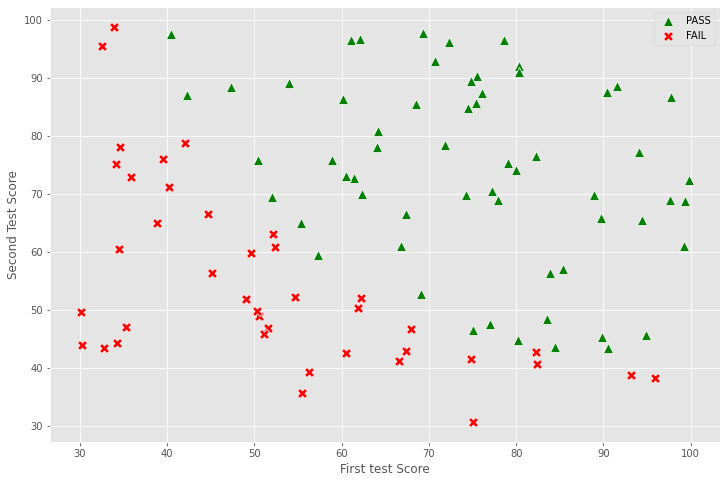

In [54]:
A = sns.scatterplot( x = scores[Pass[:, 0], 0],
                    y = scores[Pass[:, 0], 1],
                    marker = "^",
                    color = 'green',
                    s = 100)
sns.scatterplot(x = scores[Fail[:, 0], 0],
                    y = scores[Fail[:, 0], 1],
                    marker = "X",
                    color = 'Red',
                    s = 100)
A.set( xlabel = "First test Score", ylabel = "Second Test Score")
A.legend(['PASS','FAIL'])
plt.show()

In [55]:
#Define the sigmoid function used for computation
def Sigmoid(x):
    return 1/(1 + np.exp(-x))


In [57]:
def costFunction(theta,x,y):
    M = len(y)
    y_pred = Sigmoid(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = (- 1 / M) * sum(error)
    gradient = (1 / M) * np.dot(x.transpose() , (y_pred - y))
    return cost[0],gradient
    

In [58]:
Mean_Scores = np.mean(scores, axis = 0)
Std_Scores = np.std(scores, axis = 0)
scores = (scores - Mean_Scores)/ Std_Scores

In [60]:
Rows = scores.shape[0]
Cols = scores.shape[1]

X = np.append(np.ones((Rows , 1)) , scores, axis = 1)
Y = results.reshape(Rows, 1)

Theta_Initial = np.zeros((Cols + 1, 1))
cost, gradient = costFunction(Theta_Initial,X,Y)

print("COST:",cost)
print("Gradients at initialisation:
      ",gradient)

COST: 0.693147180559946
Gradients at initialisation [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [61]:
#Updating theta values
def gradientDescent(x ,y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = costFunction(theta,x,y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [62]:
theta, costs = gradientDescent(X ,Y ,Theta_Initial ,1, 200 )

In [63]:
print("Theta after runninng: ", theta)
print("Resulting Cost: ", costs[-1])

Theta after runninng:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting Cost:  0.2048938203512014


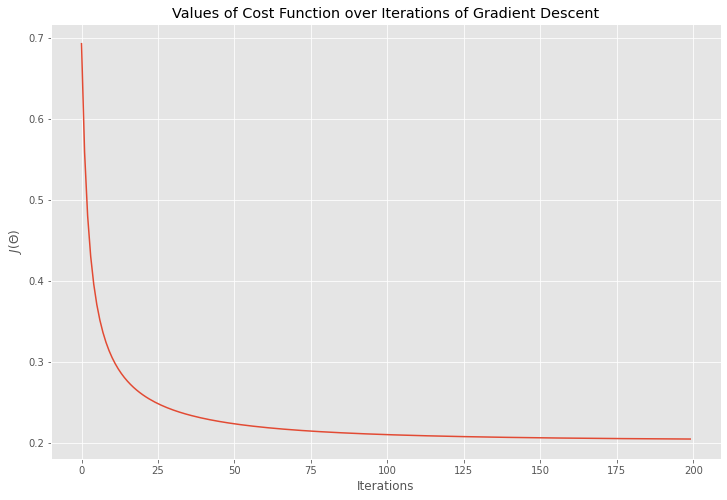

In [65]:
#Plotting the Value of Theta vs Iterations
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent");

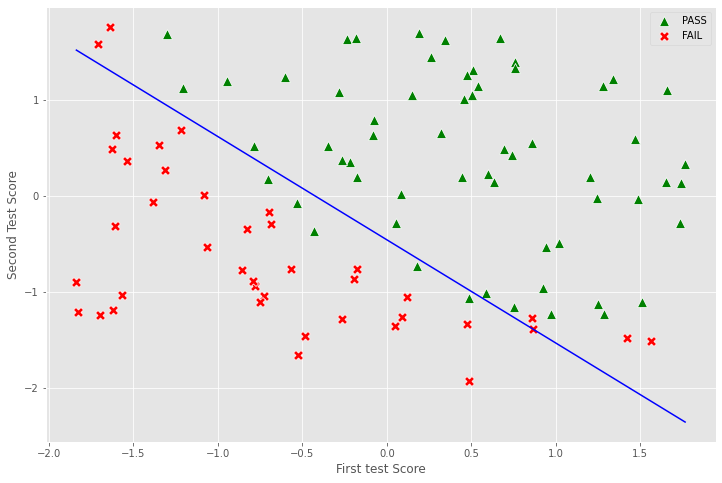

In [70]:
#Plotting the decision boundary
A = sns.scatterplot( x = scores[Pass[:, 0], 0],
                    y = scores[Pass[:, 0], 1],
                    marker = "^",
                    color = 'green',
                    s = 100)
sns.scatterplot(x = scores[Fail[:, 0], 0],
                y = scores[Fail[:, 0], 1],
                marker = "X",
                color = 'Red',
                s = 100)
A.set( xlabel = "First test Score", ylabel = "Second Test Score")
A.legend(['PASS','FAIL'])



X_Boundary = np.array([np.min(X[: , 1]), np.max(X[: , 1])])
Y_Boundary = -(theta[0] + theta[1] * X_Boundary) / theta[2]

sns.lineplot( x = X_Boundary, y = Y_Boundary, color = "Blue")
plt.show()

In [71]:
#Predictions using optimised Theta Values
def Predict(theta , x):
    results = x.dot(theta)
    return results > 0


In [74]:
Predicted_Values = Predict(theta, X)
print("Accuracy of the Developed Model:",sum(Predicted_Values == Y)[0], "%")

Accuracy of the Developed Model: 89 %


In [78]:
#Test example by entering two scores to see probablity of passing
test = np.array([50,79])
test = (test - Mean_Scores)/Std_Scores
test = np.append(np.ones(1),test)
Probablity = Sigmoid(test.dot(theta)) * 100
print("Probablity of passing is ", np.round(Probablity[0]),"%.")

Probablity of passing is  71.0 %.
